# 5. Sistemas de Partículas
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 6E

Todos os princípios aprendidos em dinâmica de partículas podem ser extendidos para o sistema de partículas.

### Exemplo 1:
![](sis_par1.png)

Definição de símbolos dinâmicos e constantes:

In [1]:
import sympy as sy
import sympy.physics.mechanics as me

In [2]:
theta1,theta2 = me.dynamicsymbols('theta_1 theta_2')
L1,L2,m1,m2,g,k,a = sy.symbols('L1 L2 m1 m2 g k a')
t = me.dynamicsymbols._t

Criação dos sistemas de referência:

In [3]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

Orientação dos sistemas de referência:
![](sis_par2.png)

In [4]:
A.orient(N,'Axis',[theta1,N.z])
B.orient(N,'Axis',[theta2,N.z])

Criação do ponto fixo:

In [5]:
O = me.Point('O')
O.set_vel(N,0)

Criação do ponto P1:

In [6]:
P1 = me.Point('P1')
pP1O = -L1*A.y
P1.set_pos(O,pP1O)
P1.set_vel(N,pP1O.dt(N))

Criação do ponto P2:

In [7]:
P2 = me.Point('P2')
pP2O = L2*N.x - L1*B.y
P2.set_pos(O,pP2O)
P2.set_vel(N,pP2O.dt(N))

Criação das partículas: 

```python
ParP1 = me.Particle('ParP1',P1,m1)
```

|símbolo| significado |
|-------|-------------|
| 'ParP1' | Nome da partícula entre aspas |
| P1 | Ponto associado à particula |
| m1 | Massa da partícula |

In [8]:
ParP1 = me.Particle('P1',P1,m1)
ParP2 = me.Particle('P2',P2,m2)

Diagrama de Corpo Livre:
![](sis_par3.png)

$\vec{F}_{12}$ e $\vec{F}_{21}$ são as **forças de vínculo**, ou seja, são as forças que ligam as duas partículas. Essas forças fazem com que as equações de movimento estejam inter-relacionadas. 

In [9]:
F12 = -k*a*(sy.sin(theta1) - sy.sin(theta2))*N.x
F12

- a*k*(sin(theta_1) - sin(theta_2))*N.x

In [10]:
F21 = -F12
F21

a*k*(sin(theta_1) - sin(theta_2))*N.x

In [11]:
T1,T2 = sy.symbols('T1 T2')

In [12]:
R1 = T1*A.y - m1*g*N.y + F21

In [13]:
R2 = T2*B.y - m2*g*N.y + F12

Equação de movimento da partícula 1:

In [14]:
EqmovP1 = R1 - ParP1.linear_momentum(N).dt(N)
EqmovP1

a*k*(sin(theta_1) - sin(theta_2))*N.x - g*m1*N.y - L1*m1*theta_1''*A.x + (-L1*m1*theta_1'**2 + T1)*A.y

Equação de movimento da partícula 2:

In [15]:
EqmovP2 = R2 - ParP2.linear_momentum(N).dt(N)
EqmovP2

- a*k*(sin(theta_1) - sin(theta_2))*N.x - g*m2*N.y - L1*m2*theta_2''*B.x + (-L1*m2*theta_2'**2 + T2)*B.y

Isolando $\ddot{\theta}_1$ e $\ddot{\theta}_2$:

In [16]:
theta1_pp = sy.solve(EqmovP1.dot(A.x),theta1.diff(t,2))[0]
theta1_pp

(a*k*(sin(theta_1(t)) - sin(theta_2(t)))*cos(theta_1(t)) - g*m1*sin(theta_1(t)))/(L1*m1)

In [17]:
theta2_pp = sy.solve(EqmovP2.dot(B.x),theta2.diff(t,2))[0]
theta2_pp

(a*k*(-sin(theta_1(t)) + sin(theta_2(t)))*cos(theta_2(t)) - g*m2*sin(theta_2(t)))/(L1*m2)

Criação do dicionário para as constantes:

In [18]:
constantes = {m1:1,m2:1,L1:0.5,L2:0.5,g:9.8,a:0.3,k:2}

Obtenção de uma equação para $\ddot{\theta}_1$ com os valores numéricos das constantes:

In [19]:
th1_pp_num = theta1_pp.subs(constantes)
th1_pp_num

1.2*(sin(theta_1(t)) - sin(theta_2(t)))*cos(theta_1(t)) - 19.6*sin(theta_1(t))

Obtenção de uma equação para $\ddot{\theta}_1$ com os valores numéricos das constantes:

In [20]:
th2_pp_num = theta2_pp.subs(constantes)
th2_pp_num

1.2*(-sin(theta_1(t)) + sin(theta_2(t)))*cos(theta_2(t)) - 19.6*sin(theta_2(t))

Criação do tempo numérico:

In [21]:
from numpy import linspace

In [22]:
tn = linspace(0,20,400)

Criação da função para a integração do sistema:
$$ X = \left[ \begin{array}{c} \theta_1 \\ \dot{\theta}_{1} \\ \theta_2 \\ \dot{\theta}_2  \end{array} \right] $$ 

$$ \dot{X} = \left[ \begin{array}{c} \dot{\theta}_1 \\ \ddot{\theta}_{1} \\ \dot{\theta}_2 \\ \ddot{\theta}_2  \end{array} \right] $$

$$Sistema(X,t_n) = \dot{X}$$

In [23]:
def Sistema(X,tn):
    dic_sis = {theta1:X[0],theta1.diff(t):X[1],theta2:X[2],theta2.diff(t):X[3]}
    Xp0 = X[1]
    Xp1 = th1_pp_num.subs(dic_sis)
    Xp2 = X[3]
    Xp3 = th2_pp_num.subs(dic_sis)
    return [Xp0,Xp1,Xp2,Xp3]

Condições iniciais:

In [24]:
X0 = [0.2,0,0.4,0]

Integração numérica usando Runge Kutta de 4ª ordem:

In [25]:
from scipy.integrate import odeint

In [26]:
X = odeint(Sistema,X0,tn)

Resultados:

In [27]:
import matplotlib.pyplot as plt

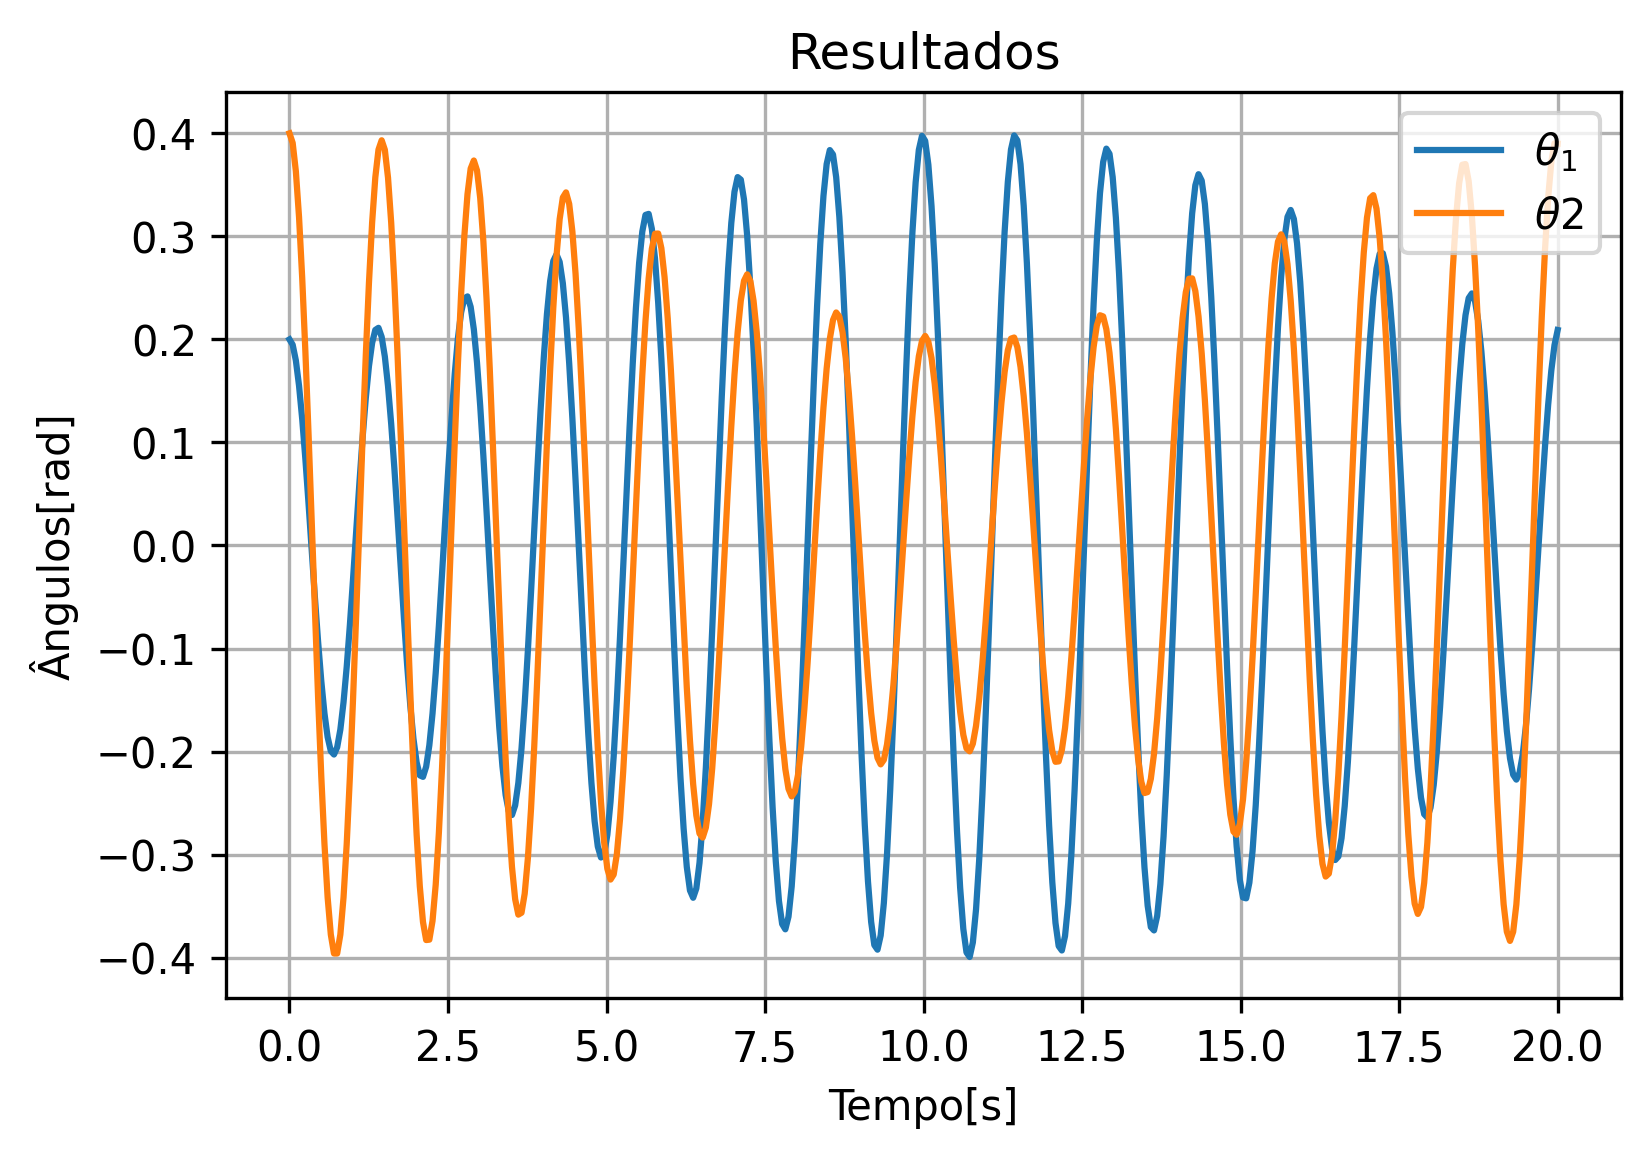

In [28]:
plt.figure(dpi=300)
plt.plot(tn,X[:,[0,2]])
plt.xlabel('Tempo[s]')
plt.ylabel('Ângulos[rad]')
plt.legend([r'$\theta_1$',r'$\theta2$'])
plt.title('Resultados')
plt.grid(True)
plt.show()

Animando os resultados:

In [29]:
from matplotlib import animation, rc
from IPython.display import HTML

x0 = 0
y0 = 0
x1 = me.dot(pP1O,N.x)
x1 = x1.subs(constantes)
y1 = me.dot(pP1O,N.y)
y1 = y1.subs(constantes)
x2 = me.dot(pP2O,N.x)
x2 = x2.subs(constantes)
y2 = me.dot(pP2O,N.y)
y2 = y2.subs(constantes)

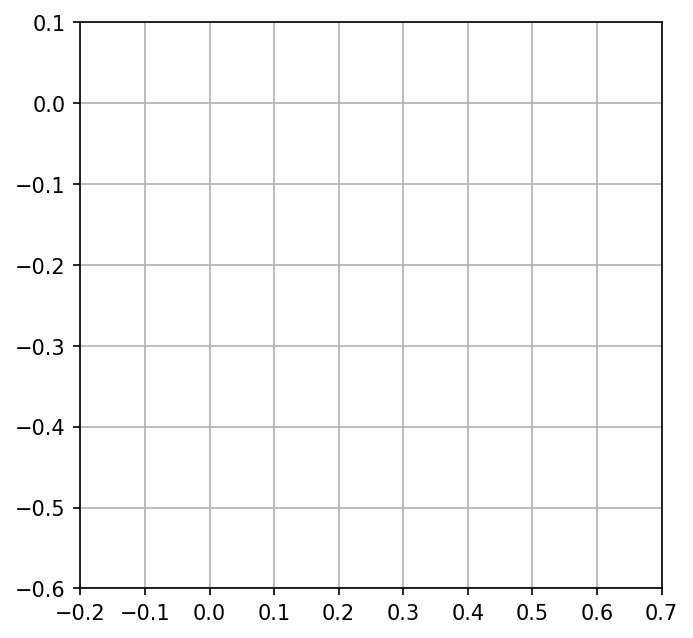

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=150

fig, ax = plt.subplots()

ax.set_xlim(( -0.2, 0.7))
ax.set_ylim((-0.6, 0.1))
ax.grid(True)
line, = ax.plot([], [], 'o-')

def animate(i):
    thn = {theta1:X[i,0],theta2:X[i,2]}
    xp1 = x1.subs(thn)
    xp2 = x2.subs(thn)
    yp1 = y1.subs(thn)
    yp2 = y2.subs(thn)
    line.set_data([x0,xp1,x0,x0+0.5,xp2],[y0,yp1,y0,y0,yp2])
    return (line,)

def init():
    line.set_data([], [])
    return (line,)

In [31]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(tn), interval=40, blit=True)
HTML(anim.to_html5_video())

## Centro de Massa

Se $S$ é um conjunto de partículas $P_1,...,P_{\nu}$ de massas $m_1,...,m_{\nu}$, respectivamente, existe um único ponto $S^*$ tal que:
$$\sum_{i=1}^{\nu} m_i \vec{r}_i = \vec{0}$$
onde $\vec{r}_i$ é o vetor posição de $P_i(i = 1,...,\nu)$ em relação a $S^*$. O ponto $S^*$ é chamado de centro de massa de $S$ e pode ser localizado da seguinte forma:
$$\vec{p}^{*} = \dfrac{\sum_{i=1}^{\nu} m_i \vec{p}_i}{\sum_{i=1}^{\nu} m_i}$$
onde $\vec{p}_i$ é o vetor posição de $P_i$ em relação ao ponto $O$, em que $O$ é um ponto qualquer e $\vec{p}^*$ é o vetor posição do centro de massa em relação ao ponto $O$. 

**Exemplo 1:** <br>
Obter o centro de massa do sistema mostrado na figura abaixo: 
![](ex4-1.png)

In [32]:
m1,m2,m3 = sy.symbols('m1 m2 m3')

In [33]:
N = me.ReferenceFrame('N')

In [34]:
p1 = 2*N.x + 2*N.y + 5*N.z
p2 = 3*N.x + 4*N.y + 3*N.z
p3 = 5*N.x + 4*N.y + 2*N.z

In [35]:
lista1a = [m1*p1,m2*p2,m3*p3]
lista1a

[2*m1*N.x + 2*m1*N.y + 5*m1*N.z,
 3*m2*N.x + 4*m2*N.y + 3*m2*N.z,
 5*m3*N.x + 4*m3*N.y + 2*m3*N.z]

In [36]:
lista1b = [m1,m2,m3]

In [37]:
cm = sum(lista1a)/sum(lista1b)
cm

(2*m1 + 3*m2 + 5*m3)/(m1 + m2 + m3)*N.x + (2*m1 + 4*m2 + 4*m3)/(m1 + m2 + m3)*N.y + (5*m1 + 3*m2 + 2*m3)/(m1 + m2 + m3)*N.z

In [38]:
dic1 = {m1:5,m2:10,m3:2} 

In [39]:
cm.subs(dic1)

50/17*N.x + 58/17*N.y + 59/17*N.z

[Voltar para o capítulo anterior](Din4.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din6.ipynb)